# New York housing price analysis

In this notebook, we analyze a dataset containing housing prices in New York city based on different attributes with the aim of constructing a regression model with a subset of of these features for future housing price predictions. This notebook also contains a detailed 'Exploratory Data Analysis' section containing relevant graphs for determining the relationships between the different attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

df_housing = pd.read_csv('NY-House-Dataset.csv')

df_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


The dataset comprises of 17 columns, 16 of which are features. They are - 
1. Broker 
2. Type of property
3. Number of bedrooms
4. Number of bathrooms
5. Property area in square feet
6. Address of the property
7. State (with ZIP code)
8. Main address (a slightly detailed version of address)
9. Administrative area level (somewhat more complicated to define since it contains both 'New York County' and 'United States')
10. Locality
11. Sublocality
12. Street name
13. Long name
14. Formatted address (the most complete address provided in the dataframe)
15. Latitude
16. Longitude 

There are no missing values in any of the columns (in actuality, there were missing data and, as we shall see, they have just been filled in by the person who created the dataset). However, most columns in the dataframe are strings. But most of the string features might as well be redundant.

In [2]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [3]:
df_housing.TYPE.unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

To simply readability, we remove 'for sale' from some of the entries in the 'TYPE' column using regex.

In [4]:
df_housing.TYPE = df_housing.TYPE.str.replace('\sfor sale$', '', regex=True) # the pattern '\sfor sale$' searches for the occurrence of ' for sale' from the end of the strings

df_housing.TYPE.unique()

array(['Condo', 'House', 'Townhouse', 'Co-op', 'Multi-family home',
       'For sale', 'Contingent', 'Land', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house', 'Condop'], dtype=object)

We can also collect all the unique ZIP codes from 'MAIN_ADDRESS' or 'FORMATTED_ADDRESS' by applying a string split and collecting the last element. Different neighborhoods in NYC correspond to different ZIP collections. A correspondence between the two will be formed later.

In [5]:
zip_codes = df_housing.MAIN_ADDRESS.apply(lambda x: str.split(x)[-1])

df_housing['ZIP_CODES'] = zip_codes 

print(zip_codes.unique())
print('Total number of unique ZIP codes: ' + str(len(zip_codes.unique())))

['10022' '10019' '10312' '10065' '11238' '10027' '10304' '10473' '11230'
 '10451' '10303' '11372' '11373' '10014' '11377' '11209' '10471' '11374'
 '10301' '11375' '10465' '10307' '11435' '11214' '10314' '11207' '11219'
 '11355' '11249' '10453' '11204' '11421' '10012' '11358' '11419' '10013'
 '11231' '11217' '10023' '11235' '10002' '11218' '10306' '10308' '10075'
 '11221' '11237' '11357' '10305' '11385' '10466' '11422' '10128' '10010'
 '11436' '11234' '10025' '11210' '10021' '10463' '10469' '10470' '10309'
 '11229' '11215' '10029' '10031' '11228' '10467' '11208' '11417' '11413'
 '10032' '11691' '11426' '10007' '11360' '11103' '11005' '11365' '10458'
 '10024' '11697' '10452' '11414' '11411' '11224' '11694' '10280' '11201'
 '11369' '11362' '10474' '11354' '11415' '10038' '11105' '11216' '10302'
 '11368' '11223' '10011' '10016' '10462' '10475' '11212' '11205' '11203'
 '10036' '10028' '10017' '10033' '11236' '10310' '10006' '10001' '11226'
 '10040' '11378' '10003' '10069' '10472' '11429' '1

The SUBLOCALITY column is quite inconsistent - with a combination of county and neighborhood information. For example, the five boroughs of NYC are coextensive with the five counties: New York County (Manhattan), Kings County (Brooklyn), Bronx County (The Bronx), Richmond County (Staten Island) and Queens County (Queens).

In [6]:
df_housing.SUBLOCALITY.unique()

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

## Exploratory Data Analysis

We first look at the descriptive statistics of the dataset. We pay particular attention to the 'PRICE' attribute and its statistics 
$$ \rm{E}\left( \rm{PRICE} \right) = \$\:2.36\times 10^6,\:\rm{PRICE}_{\rm{min}}=\$\:2494.00,\:\rm{PRICE}_{\rm{max}}=\$\:2.15\times 10^9,\:\sigma=\$\:3.14\times 10^7 $$
There is great disparity between the minimum and maximum prices and there may be many outliers present. Importantly, we will see that prices are quite dependent on the NYC borough in which they are located as well as the community district of the particular borough.

In [7]:
df_housing.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [8]:
'''
The PRICE column has an extremly wide range of values from 10^3 to 10^9. For easier visual inspection, we create a LOG_PRICE column and produce a pairplot.
'''
df_housing['LOG_PRICE'] = df_housing['PRICE'].apply(lambda x: np.log10(x))

'''
Another important quantity is LOG_SQFT
'''
df_housing['LOG_SQFT'] = df_housing['PROPERTYSQFT'].apply(lambda x: np.log10(x))

### Correlations

How are the different numerical attributes correlated? We can obtain some relevant information regarding this through the scatterplot matrix (pairplot) and a correlation matrix heatmap. The most obvious linear correlation is between number of beds and baths with $r^2 = 0.78$. 'BEDS' and 'PROPERTYSQFT' also display some lienar correlation. However, it is not as strong since the properties that are the largest also have fewer beds. Furthermore, the logarithmic price has some positive correlation with all of these attributes. The relation between 'PRICE' with 'LATITUDE' and 'LONGITUDE' may as well depend on particular borough location of the property. The correlations improve when the logarithms of PRICE and PROPERTYSQFT are considered.

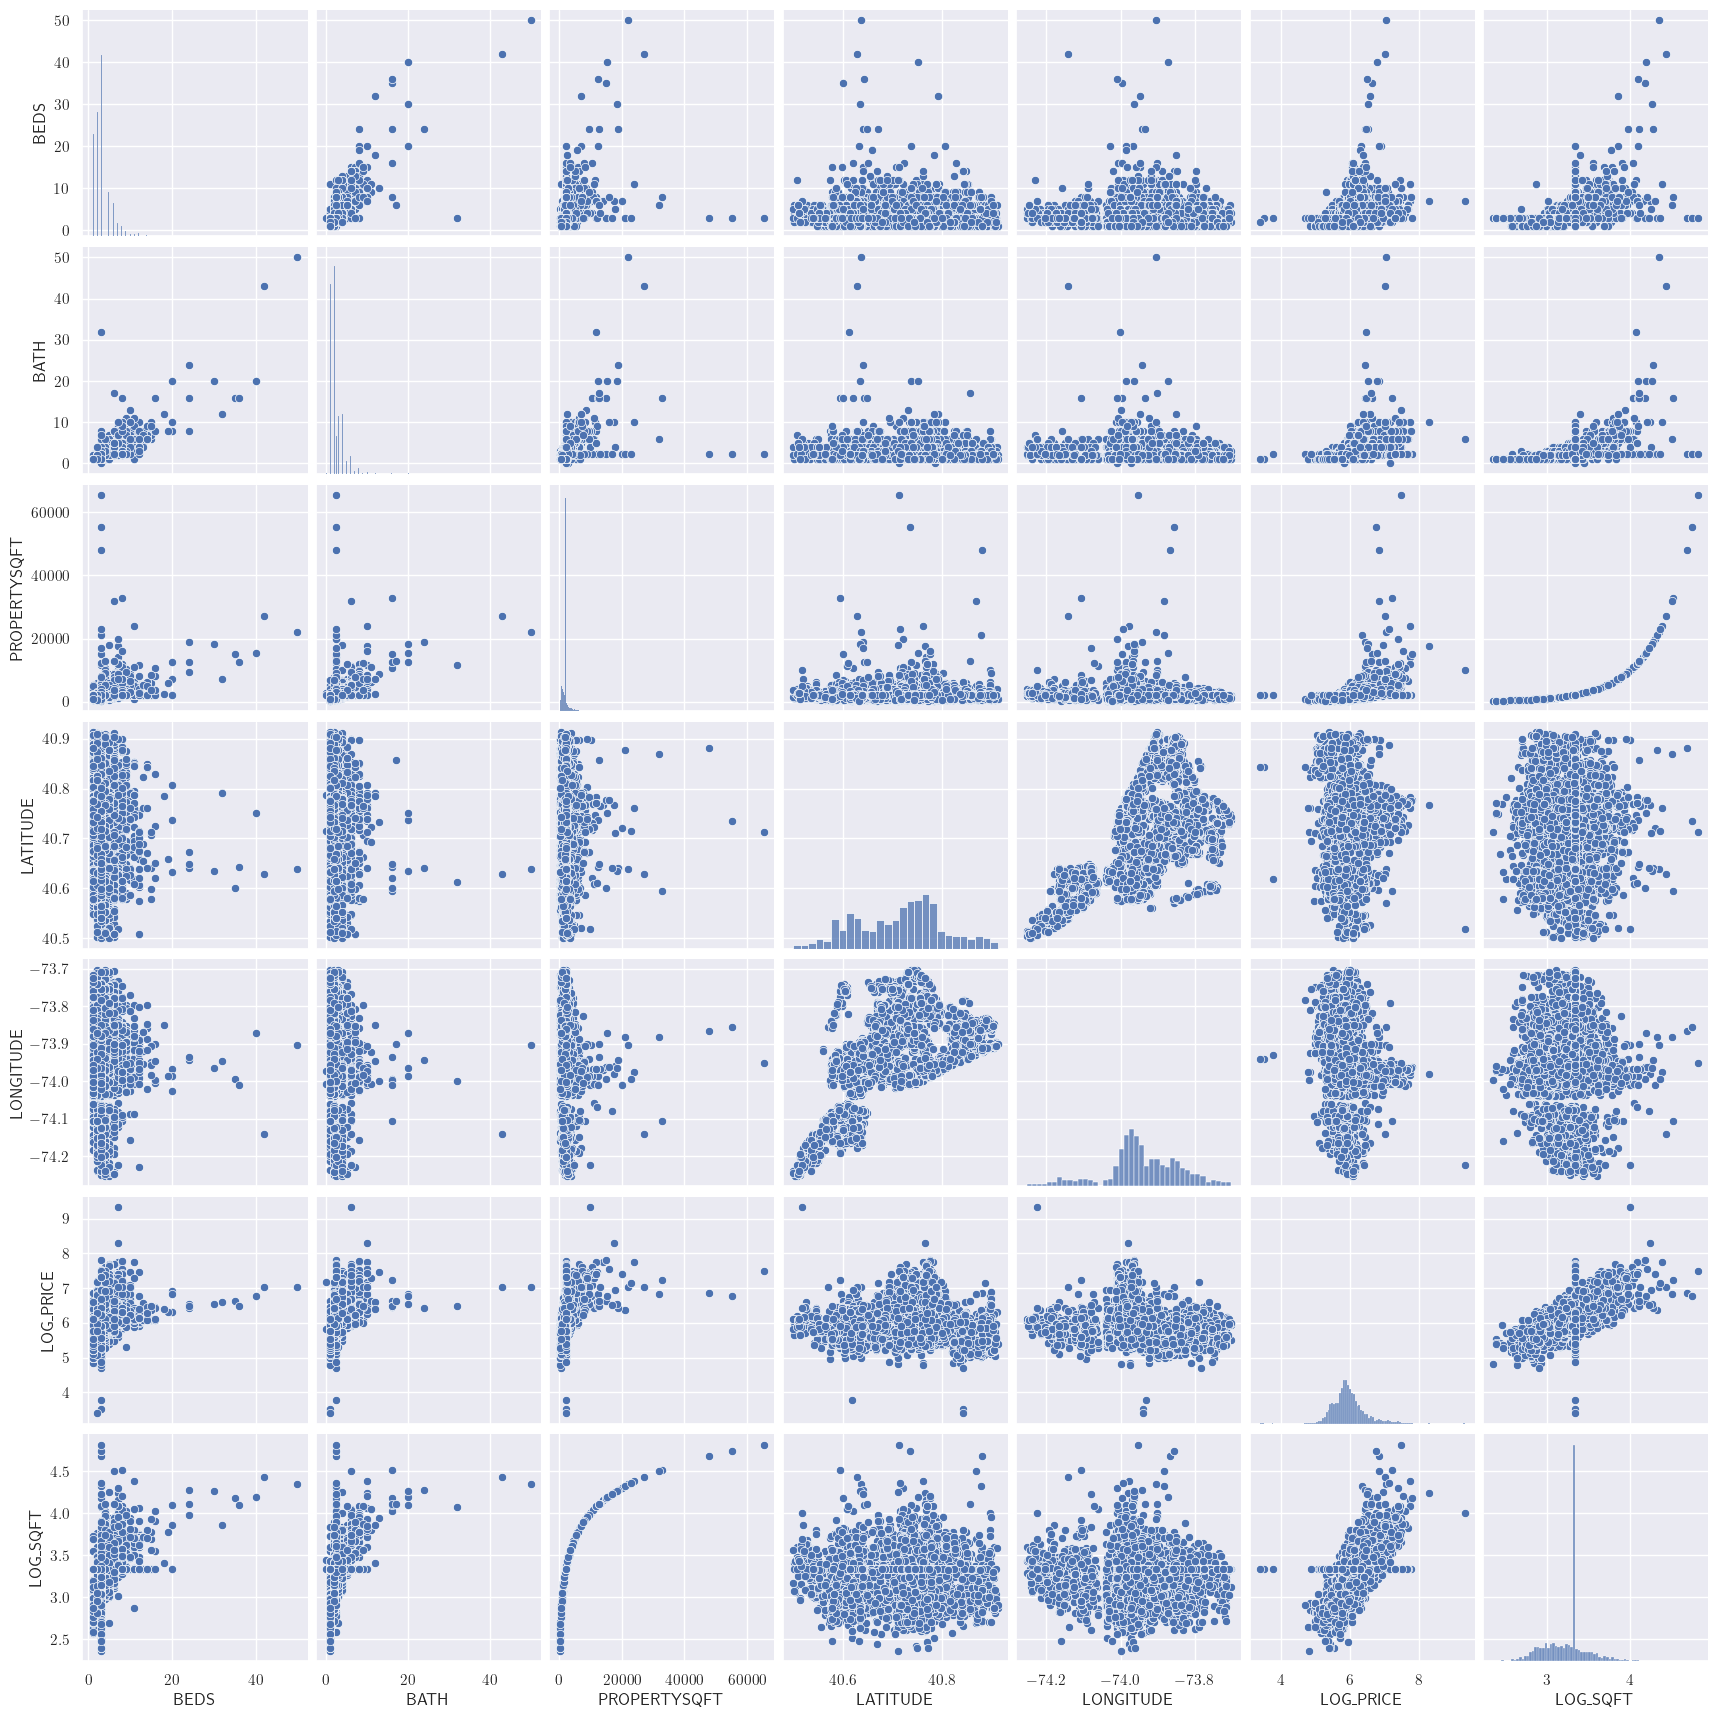

In [9]:
sns.pairplot( data=df_housing.iloc[:,3:], diag_kind='hist'  )
plt.show()

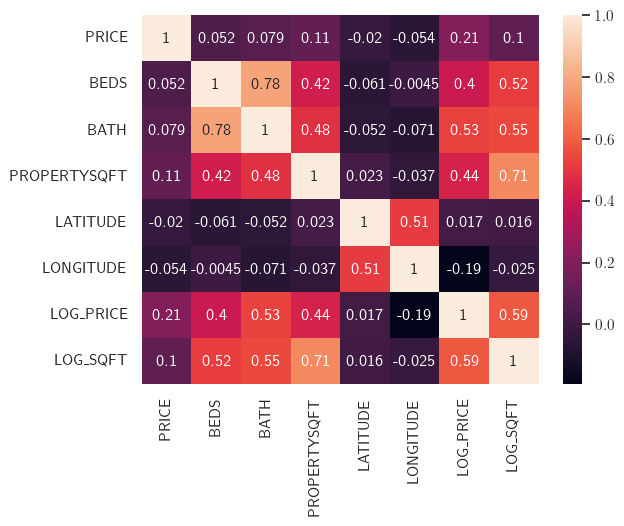

In [10]:
sns.heatmap(df_housing.select_dtypes(['int64', 'float64']).corr(), annot=True)
plt.show()

### Types of properties, possible errors in data and outliers

Important statistics can be gleamed from the relationship between price and the type of property. From the dataset, we find thirteen unique types of properties. Among them, we observe that certain types of properties for sale, there are also contingent properties and certain properties for sale without descriptors and foreclosures. These types of properties without fixed description maybe problematic for machine learning purposes since they cannot be really classified under the labels of most frequently occuring properties. For simplicity, we place the following
- Coming Soon
- Contingent, Pending
- Foreclosure
- Mobile house
- For sale

under a broader category called 'Others'.

In [11]:
other_col = ['Coming Soon', 'Contingent', 'Pending', 'Foreclosure', 'Mobile house', 'For sale']

df_housing.loc[df_housing.TYPE.isin(other_col), 'TYPE'] = 'Others'

In [16]:
df_housing.groupby('TYPE')[['PRICE', 'PROPERTYSQFT']].describe()

PRICE                                                   \
                    count          mean           std       min        25%   
TYPE                                                                         
Co-op              1450.0  1.100418e+06  3.251499e+06   49500.0   279000.0   
Condo               891.0  2.630710e+06  7.791476e+06   60000.0   575000.0   
Condop                5.0  9.986000e+05  2.255378e+05  598000.0  1065000.0   
House              1012.0  3.684216e+06  6.754506e+07  130000.0   659000.0   
Land                 49.0  1.073021e+06  1.212969e+06    5800.0   285000.0   
Multi-family home   727.0  1.680428e+06  2.465464e+06  250000.0   890000.0   
Others              368.0  1.263646e+06  2.391170e+06    2494.0   499000.0   
Townhouse           299.0  6.365925e+06  8.368261e+06  315000.0  1231500.0   

                                                      PROPERTYSQFT  \
                         50%        75%           max        count   
TYPE                                                                 
Co-op               425000.0   799000.0  6.000000e+07       1450.0   
Condo               899000.0  2150000.0  1.950000e+08        891.0   
Condop             1080000.0  1125000.0  1.125000e+06          5.0   
House               859000.0  1289000.0  2.147484e+09       1012.0   
Land                650000.0  1395000.0  6.100000e+06         49.0   
Multi-family home  1199000.0  1690000.0  3.400000e+07        727.0   
Others              769000.0  1190750.0  3.600000e+07        368.0   
Townhouse          2950000.0  7950000.0  6.500000e+07        299.0   

                                                                       \
                          mean          std          min          25%   
TYPE                                                                    
Co-op              1661.939812   749.630336   250.000000   900.000000   
Condo              1574.625033  1166.496161   294.000000   838.500000   
Condop             2184.207862     0.000000  2184.207862  2184.207862   
House              2255.556856  1911.646137   430.000000  1440.000000   
Land               2159.019946   176.315409   950.000000  2184.207862   
Multi-family home  3259.883946  4683.478406   630.000000  2184.207862   
Others             2013.196308  1255.320606   230.000000  1230.000000   
Townhouse          3891.136747  2864.053979   846.000000  2184.207862   

                                                           
                           50%          75%           max  
TYPE                                                       
Co-op              2184.207862  2184.207862   7500.000000  
Condo              1230.000000  2184.207862  17545.000000  
Condop             2184.207862  2184.207862   2184.207862  
House              2176.500000  2184.207862  33000.000000  
Land               2184.207862  2184.207862   2184.207862  
Multi-family home  2184.207862  3118.000000  65535.000000  
Others             2176.603931  2184.207862  16000.000000  
Townhouse          2601.000000  5000.000000  20000.000000

In general, we observe an increase in the number of beds with property size. However, there are several properies with very large square footage by very little beds (mostly occuring for 'Multi-family homes'). For quite a few of these occurences, the number of baths exceeds the number of beds. For example, the property positioned at index 622 is reported to have 3 beds but 32 baths. Moreover, there are numerous properties where the number of baths is fractional, which probably were previously NaN values filled in with mean/median values. 

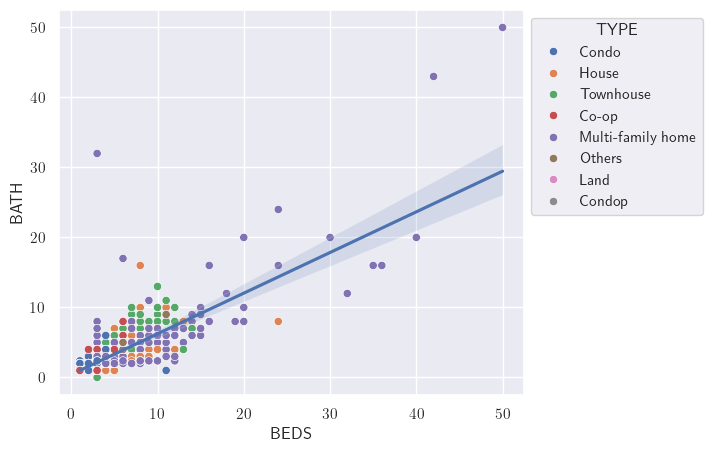

In [17]:
fig, ax = plt.subplots(figsize=(6,5))

ax = sns.scatterplot( x=df_housing.BEDS, y=df_housing.BATH, hue=df_housing.TYPE )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
sns.regplot(x=df_housing.BEDS, y=df_housing.BATH, scatter=False)
plt.show()

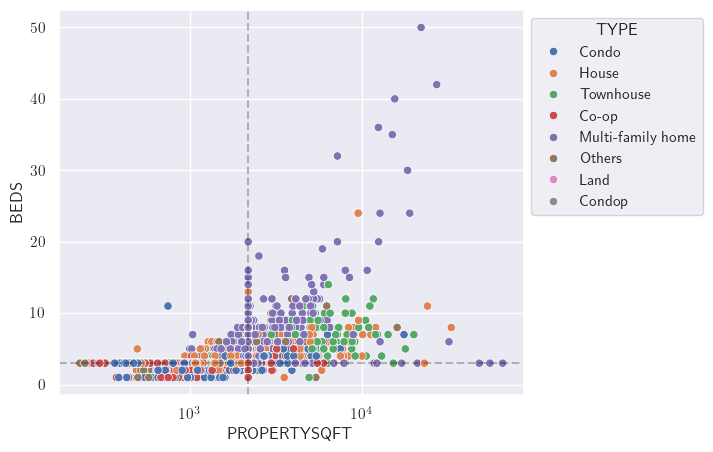

In [18]:
fig, ax = plt.subplots(figsize=(6,5))

ax = sns.scatterplot( x=df_housing.PROPERTYSQFT, y=df_housing.BEDS, hue=df_housing.TYPE )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
plt.axvline(2184, color='black', linestyle='dashed', alpha=0.25)
plt.axhline(3, color='black', linestyle='dashed', alpha=0.25)
ax.set_xscale('log')
plt.show()

Here, we see that three properties have a great disparity between the numbers of beds and baths 

1. idx = 7, # of beds = 8, # of baths = 16
2. idx = 622, # of beds = 3, # of baths = 32
3. idx = 4691, # of beds = 6, # of baths = 17

For these properties, the no. of baths will be set equal to the no. of beds.

In [19]:
df_housing[ 
    (df_housing.PROPERTYSQFT >= 10**4)
    &
    (df_housing.BEDS < 10) ][['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT']]

,TYPE,BEDS,BATH,PROPERTYSQFT
1,Condo,7,10.000000,17545.0
4,Townhouse,7,2.373861,14175.0
7,House,8,16.000000,33000.0
69,Townhouse,3,2.373861,15200.0
99,House,8,8.000000,12000.0
181,Townhouse,4,2.373861,10582.0
304,House,7,6.000000,10000.0
601,Townhouse,7,9.000000,12300.0
622,Multi-family home,3,32.000000,11760.0
823,Multi-family home,3,2.373861,48000.0


In [20]:
df_housing.loc[[7, 622, 4691], 'BATH'] = df_housing.loc[[7, 622, 4691], 'BEDS']

df_housing.loc[[7, 622, 4691]]

df_housing.BATH = df_housing.BATH.apply(np.rint) # rounding number of baths to integers

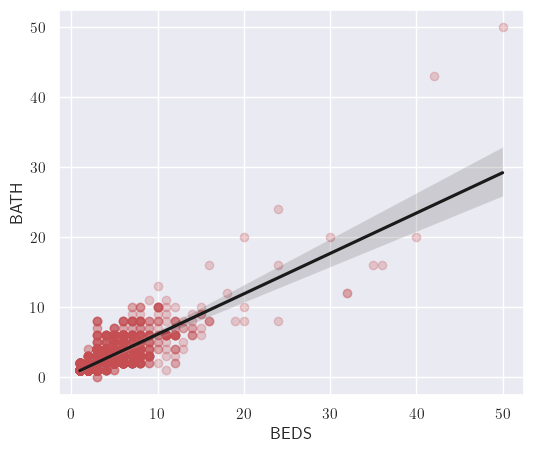

In [21]:
fig, ax = plt.subplots(figsize=(6,5))

sns.regplot(x=df_housing.BEDS, y=df_housing.BATH, line_kws=dict(color='k'), scatter_kws=dict(color='r', alpha=0.25))
plt.show()

It also appears that
$$ \log\left( \rm{PRICE} \right) \propto \log\left( \rm{PROPERTYSQFT} \right) $$
The Pearson correlation between these logarithmic quantities is $ r\approx 0.59 $, which indicates more significant correlation compared to the base quantities. The linear correlation is worsened by the large number of points that have the same property size but increasing prices.

In [22]:
log_size = df_housing.PROPERTYSQFT.apply(np.log)
log_price = df_housing.PRICE.apply(np.log)

print('Correlation between logarithms of property size and price ' + str(log_price.corr(log_size)))

Correlation between logarithms of property size and price 0.5852575237699829


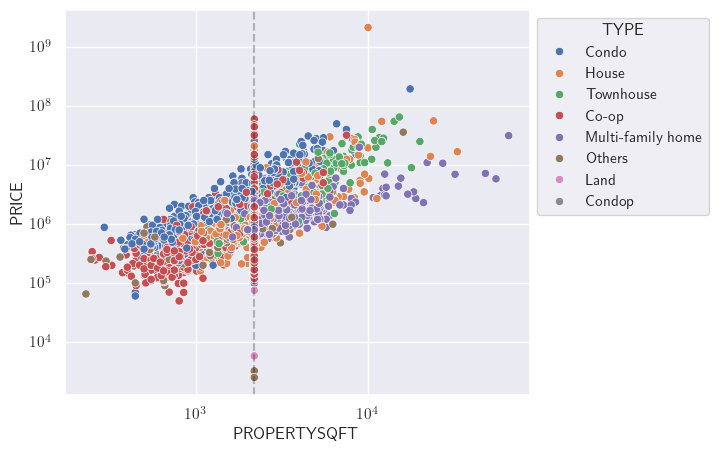

In [23]:
fig, ax = plt.subplots( figsize=(6,5))

ax = sns.scatterplot( x=df_housing.PROPERTYSQFT, y=df_housing.PRICE, hue=df_housing.TYPE )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
plt.axvline(2184, color='black', linestyle='dashed', alpha=0.25)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

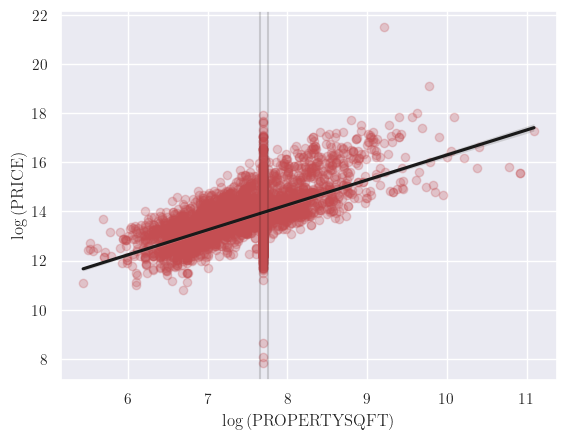

In [24]:
sns.regplot(x=log_size, y=log_price, fit_reg=True, line_kws=dict(color='k'), scatter_kws=dict(color='r', alpha=0.25))
plt.axvline(7.65, color='black', alpha=0.15)
plt.axvline(7.75, color='black', alpha=0.15)
plt.xlabel(r'$ \log\left( \rm{PROPERTYSQFT} \right) $')
plt.ylabel(r'$ \log\left( \rm{PRICE} \right) $')
plt.show()

There are a large number of entries (1621) that have been listed as having area of 2,184 sqft. This is clearly erroneous data, which, again, were former NaN values filled in with median square footage. However, they also represent a significant proportion of the total number of data points and cannot be safely ignored either. One way these can fixed is to isolate the subset of data and use the mean or median square footage of similar properties and replace the previous values with these. This will be done later when we include geographical data.

In [25]:
area = 2184.207862 # this is where these is a vertical line in the price vs sqft scatter plot

df_same_sqft = df_housing[ df_housing.PROPERTYSQFT == area ]
df_same_sqft.shape

(1621, 20)

There are two rather big outliers in terms of price. These prices are 2.147 billion USD and 195 million USD, which are of the type 'House' and 'Condo' respectively. We will see that the most expensive one is apparently an erroneous entry. This will be fixed later. The whiskers on the boxplot here are plotted such that the outliers lie beyond the 1st and 99th quantiles.

In [26]:
df_housing.PRICE.sort_values(ascending=False).head()

304     2147483647
1        195000000
69        65000000
1075      60000000
141       56000000
Name: PRICE, dtype: int64

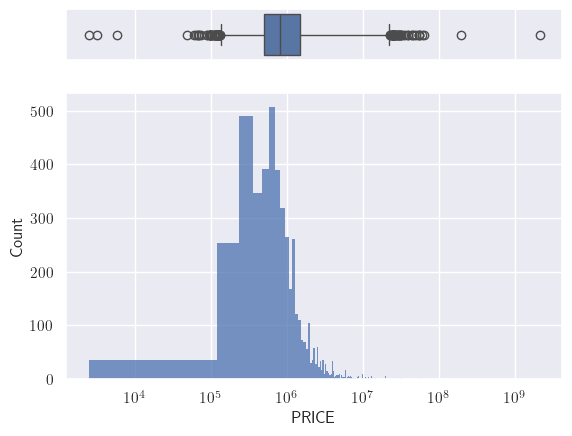

In [27]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df_housing.PRICE, ax=ax_box, whis=[1, 99]) # Boxplot with the whiskers placed at the 3 sigmas
sns.histplot(x=df_housing.PRICE, ax=ax_hist)
ax_box.set_xscale('log')
ax_hist.set_xscale('log')

plt.show()

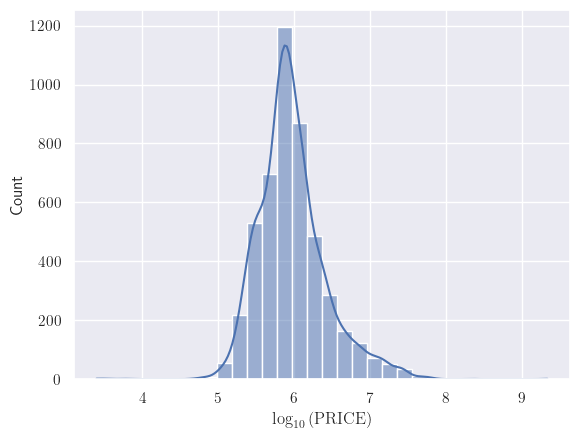

In [28]:
sns.histplot(x=df_housing.LOG_PRICE, bins=30, kde=True)
plt.xlabel(r'$\log_{10}\left( \rm{PRICE} \right)$')
plt.show()

In [30]:
whisker_low, whisker_high = df_housing.PRICE.quantile([0.01, 0.99])

print( 'Number of listings below 1st quantile: ' + str(df_housing[ df_housing.PRICE < whisker_low ].shape[0]) )
print( 'Number of listings above 99th quantile: ' + str(df_housing[ df_housing.PRICE > whisker_high ].shape[0]) )

Number of listings below 1st quantile: 48
Number of listings above 99th quantile: 47


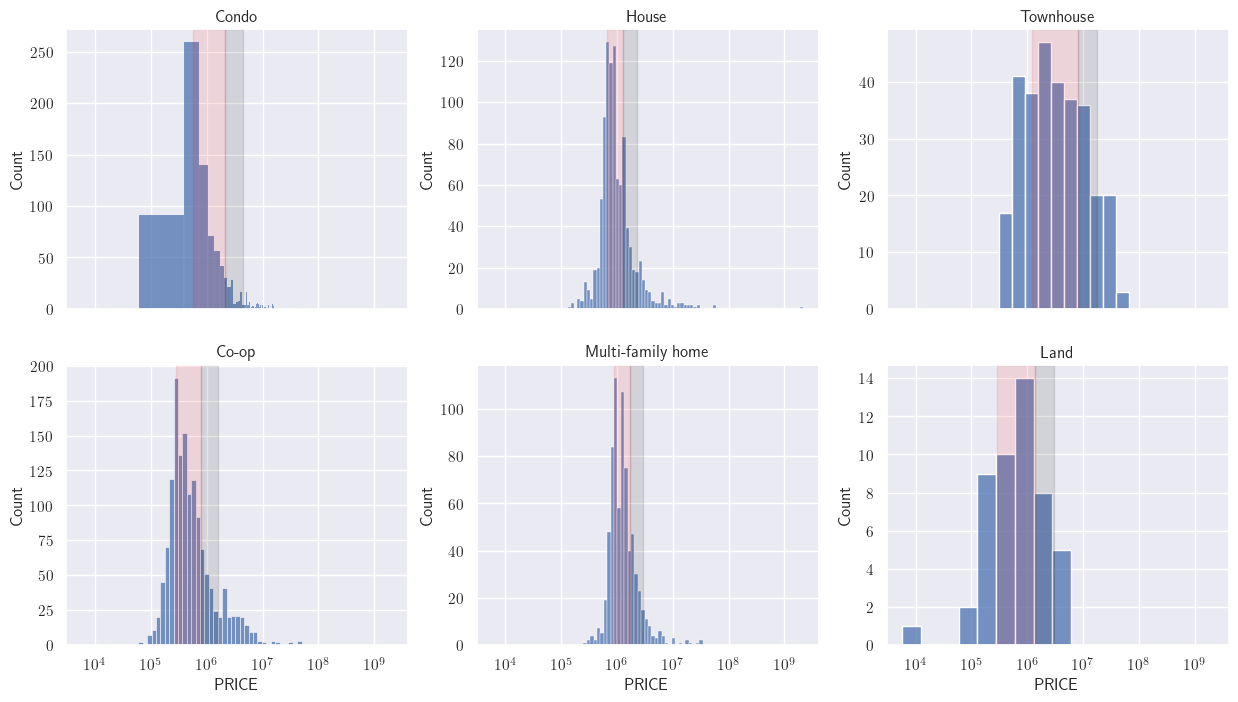

In [31]:
TYPE = ['Condo',
        'House',
        'Townhouse',
        'Co-op',
        'Multi-family home',
        'Land']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8), sharex=True)

for i, ax in enumerate(axes.flatten()):
    
    df_type = df_housing[df_housing.TYPE == TYPE[i]]
    lq, uq = df_type.PRICE.quantile([0.25, 0.75])
    iqr = uq - lq 

    sns.histplot( x=df_type.PRICE, bins='auto', ax=ax )
    ax.axvspan(lq, uq, color='red', alpha=0.1)
    ax.axvspan(uq, uq + 1.5*iqr, color='black', alpha=0.1)
    ax.set_xscale('log')
    ax.set_title(TYPE[i])

plt.show()

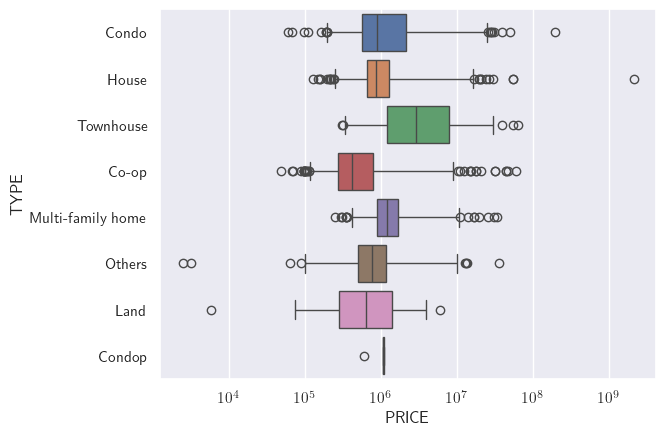

In [32]:
sns.boxplot( y=df_housing.TYPE, x = df_housing.PRICE, hue=df_housing.TYPE, whis=[1, 99] )
plt.xscale('log')

### Geography dependence

The price of property in any city is dependent on the location and the same is also true for NYC. Here we encode the price information on a map of NYC that has been segmented into boroughs and community disctricts (CDs) using geopandas. For easier interpretability, the prices have been separated into the following ranges
1. CLASS 1: $ \$\:10^3\:\rm{US} \leq \rm{PRICE} < \$\:10^4\:\rm{USD} $ 
2. CLASS 2: $ \$\:10^4\:\rm{US} \leq \rm{PRICE} < \$\:10^5\:\rm{USD} $ 
3. CLASS 3: $ \$\:10^5\:\rm{US} \leq \rm{PRICE} < \$\:10^6\:\rm{USD} $ 
4. CLASS 4: $ \$\:10^6\:\rm{US} \leq \rm{PRICE} < \$\:10^7\:\rm{USD} $ 
5. CLASS 5: $\rm{PRICE}\geq \$\:10^7\:\rm{USD}$

In [33]:
import geopandas as gpd
from geodatasets import get_path

path_to_data = get_path('nybb') # built-in geopandas dataframe on NYC
ny_boroughs = gpd.read_file(path_to_data)
ny_CD = gpd.read_file('./Community_Districts/geo_export_50afcaa7-d801-43f3-b1f5-cf1542b406ba.shp') # additional shapefile containing NYC community district data

ny_boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [34]:
ny_CD.head()

,boro_cd,shape_area,shape_leng,geometry
0,308.0,4.560379e+07,38232.886649,"POLYGON ((-73.95829 40.67983, -73.95596 40.679..."
1,205.0,3.831698e+07,29443.048056,"POLYGON ((-73.89138 40.86170, -73.89142 40.861..."
2,311.0,1.032083e+08,51534.144746,"POLYGON ((-73.97299 40.60881, -73.97296 40.608..."
3,410.0,1.720774e+08,105822.376549,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ..."
4,164.0,3.831238e+07,32721.097627,"POLYGON ((-73.94923 40.79687, -73.94942 40.796..."


In [35]:
# Gathering the coordinates (longitude/latitude) of all the CDs

ny_CD['coord'] = ny_CD['geometry'].apply( lambda x: x.representative_point().coords[:] )

ny_CD['coord'] = [coords[0] for coords in ny_CD.coord]

ny_CD['CD'] = ny_CD.boro_cd.astype(np.int64).astype(str)

ny_CD.head()

,boro_cd,shape_area,shape_leng,geometry,coord,CD
0,308.0,4.560379e+07,38232.886649,"POLYGON ((-73.95829 40.67983, -73.95596 40.679...","(-73.94545913768121, 40.67338767399892)",308
1,205.0,3.831698e+07,29443.048056,"POLYGON ((-73.89138 40.86170, -73.89142 40.861...","(-73.9097177437186, 40.85365289770583)",205
2,311.0,1.032083e+08,51534.144746,"POLYGON ((-73.97299 40.60881, -73.97296 40.608...","(-73.99428263554637, 40.60632372934502)",311
3,410.0,1.720774e+08,105822.376549,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...","(-73.82900441292807, 40.66797529939021)",410
4,164.0,3.831238e+07,32721.097627,"POLYGON ((-73.94923 40.79687, -73.94942 40.796...","(-73.96557217401126, 40.782459599544914)",164


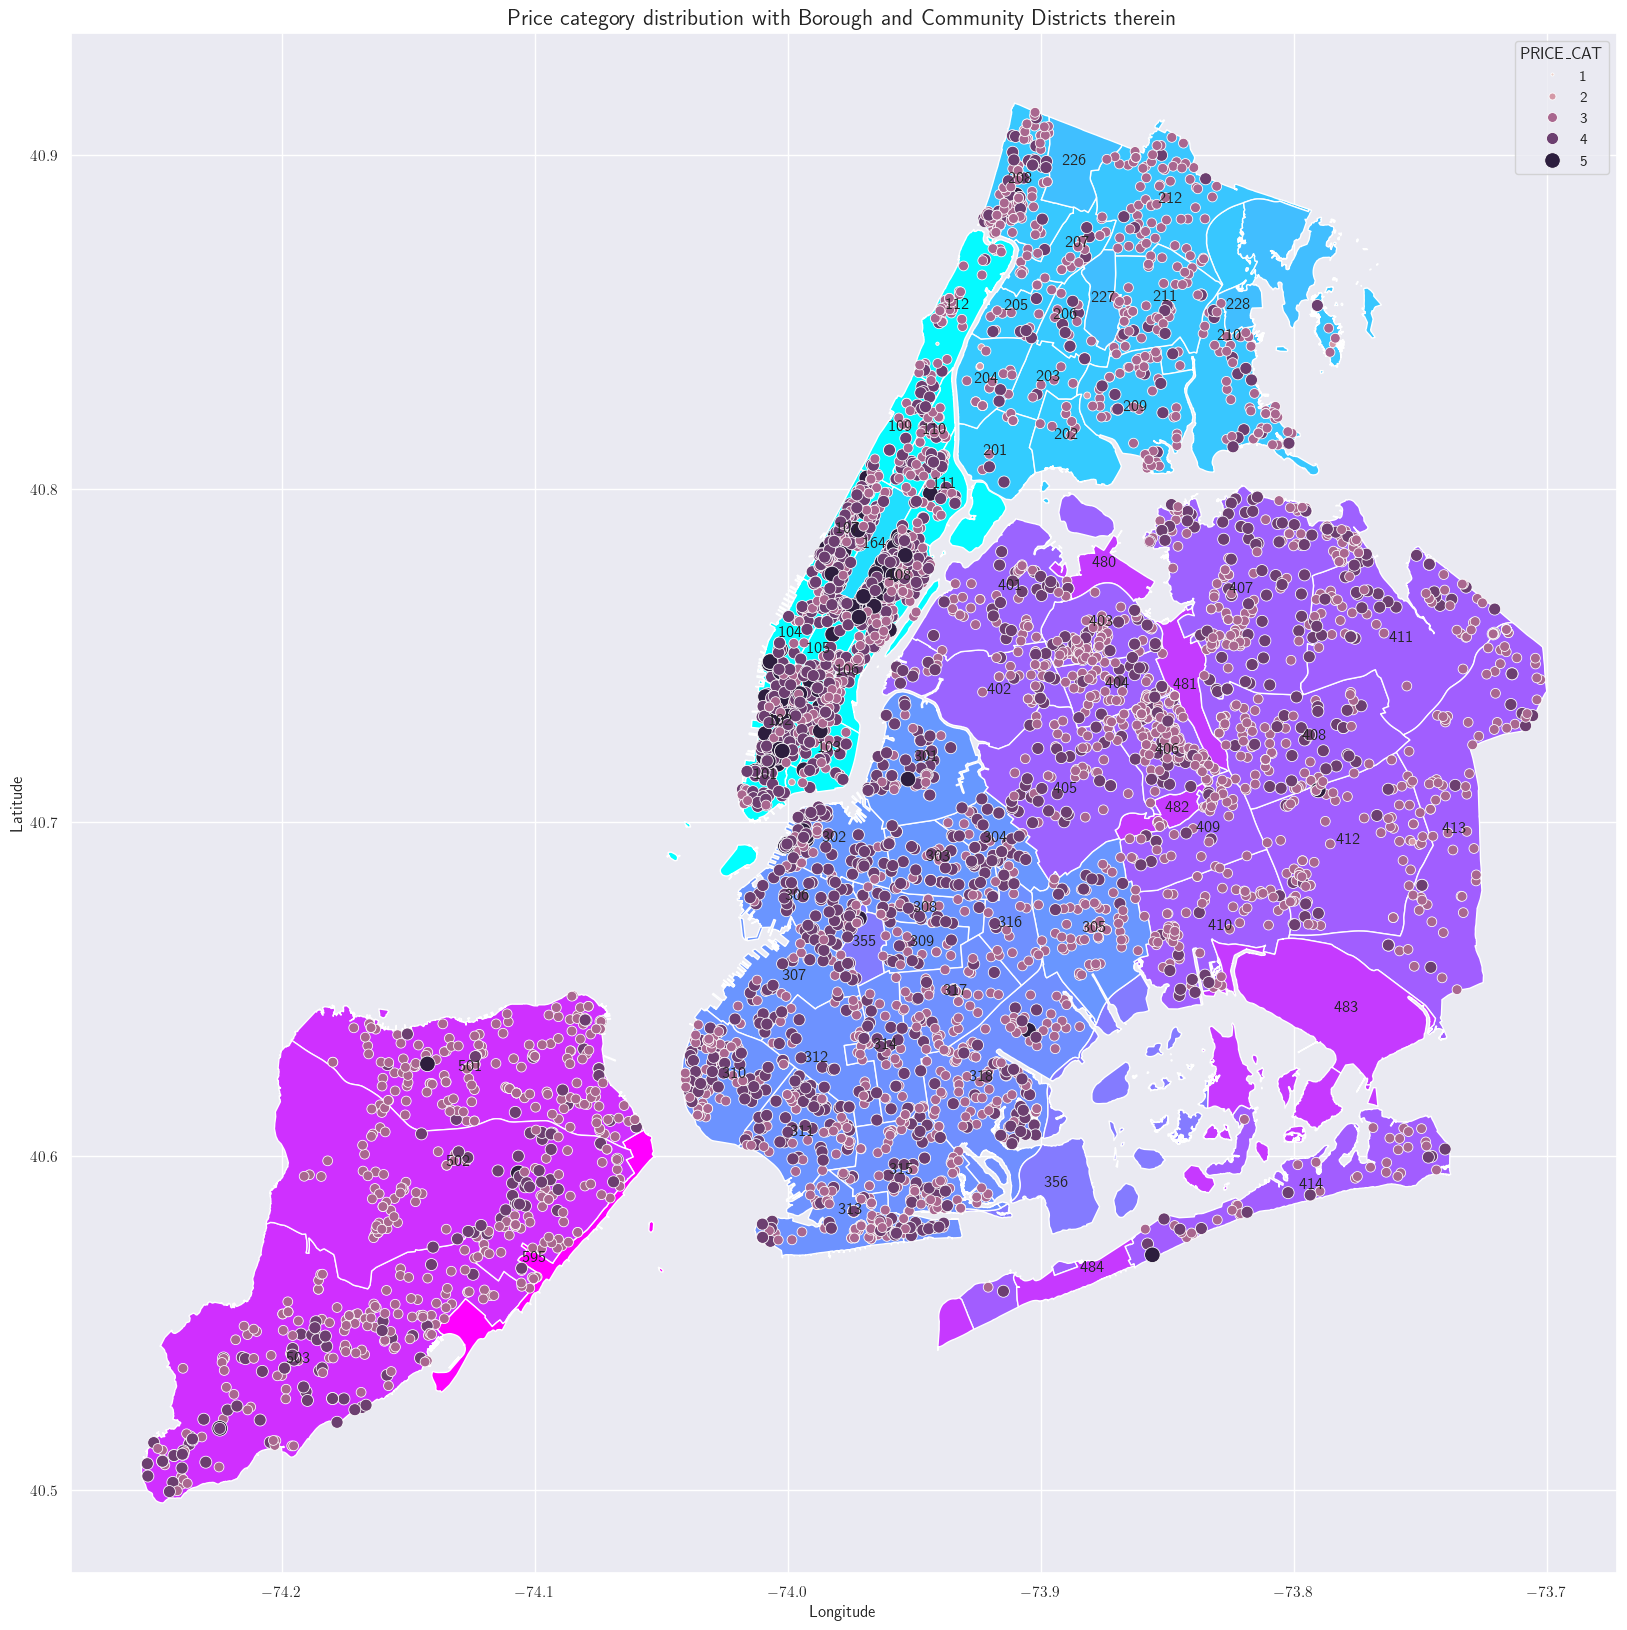

In [36]:
ny_boroughs['area'] = ny_boroughs.area
ny_boroughs = ny_boroughs.set_geometry('geometry').to_crs('EPSG:4326')

price = df_housing['PRICE']

# Such a price category can also be used for stratification of data during ML model training
def price_categorized(x):
    if 10**3 <= x < 10**4:
        return 1
    elif 10**4 <= x < 10**5:
        return 2
    elif 10**5 <= x < 10**6:
        return 3
    elif 10**6 <= x < 10**7:
        return 4
    else:
        return 5
price_cat = price.apply( price_categorized )
df_housing['PRICE_CAT'] = price_cat


fig, ax = plt.subplots(figsize=(20,20))
cmap = plt.get_cmap('jet')

ny_CD.plot(ax=ax, column='boro_cd', edgecolor='white', cmap='cool')
sns.scatterplot(x=df_housing.LONGITUDE, y=df_housing.LATITUDE, hue=df_housing.PRICE_CAT, size=df_housing.PRICE_CAT, sizes=[5,25,50,75,125])

for index, row in ny_CD.iterrows():
    plt.annotate( text=row['CD'], xy=row['coord'], horizontalalignment='center', weight='bold' )

ax.set_xlabel(r'Longitude')
ax.set_ylabel(r'Latitude')
ax.set_title(r'Price category distribution with Borough and Community Districts therein', fontsize=16)
plt.show()

As expected, the price distribution is highly dependent on the borough in which the property is located. Manhattan, Brooklyn an Queens have a similar total number of listings. However, the most expensive ones are located in Manhattan. On the otherhand, however, the data also shows that the cheapest listings are also located in Manhattan. These are obviously erroneous additions and might mean monthly rent and not the property price.

In [37]:
from shapely.geometry import Point 

'''
Create a geopandas Point object using 'LATITUDE' and 'LONGITUDE' information from the dataframe to determine which borough and community district the 
property is in.
'''
geo_points = df_housing.apply( lambda row: Point(row.LONGITUDE, row.LATITUDE), axis=1 )
df_housing['GEO_POINTS'] = geo_points

df_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,LOG_SQFT,PRICE_CAT,GEO_POINTS
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,...,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,10022,5.498311,3.146128,3,POINT (-73.9744834 40.761255)
1,Brokered by Serhant,Condo,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,...,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,10019,8.290035,4.244153,5,POINT (-73.98099089999999 40.7663935)
2,Brokered by Sowae Corp,House,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,...,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,10312,5.414973,3.304275,3,POINT (-74.1961086 40.5418051)
3,Brokered by COMPASS,Condo,69000,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,...,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,10022,4.838849,2.648360,2,POINT (-73.9746128 40.7613979)
4,Brokered by Sotheby's International Realty - E...,Townhouse,55000000,7,2.0,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,...,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,10065,7.740363,4.151523,5,POINT (-73.9698561 40.7672235)


In [38]:
def point_to_borough(point):
    check = point.within(ny_boroughs.geometry)
    idx = check[check].index[0]

    return ny_boroughs.BoroName.loc[idx]

def point_to_CD(point):
    check = point.within(ny_CD.geometry)
    idx = check[check].index[0]

    return ny_CD.boro_cd.loc[idx]

df_housing['BOROUGH'] = df_housing.GEO_POINTS.apply( point_to_borough )
df_housing['COMMUNITY_DISTRICT'] = df_housing.GEO_POINTS.apply( point_to_CD )

In [39]:
df_housing['COMMUNITY_DISTRICT'] = df_housing['COMMUNITY_DISTRICT'].astype(np.int64)
df_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,LOG_SQFT,PRICE_CAT,GEO_POINTS,BOROUGH,COMMUNITY_DISTRICT
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,...,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,10022,5.498311,3.146128,3,POINT (-73.9744834 40.761255),Manhattan,105
1,Brokered by Serhant,Condo,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,...,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,10019,8.290035,4.244153,5,POINT (-73.98099089999999 40.7663935),Manhattan,105
2,Brokered by Sowae Corp,House,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,...,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,10312,5.414973,3.304275,3,POINT (-74.1961086 40.5418051),Staten Island,503
3,Brokered by COMPASS,Condo,69000,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,...,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,10022,4.838849,2.648360,2,POINT (-73.9746128 40.7613979),Manhattan,105
4,Brokered by Sotheby's International Realty - E...,Townhouse,55000000,7,2.0,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,...,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,10065,7.740363,4.151523,5,POINT (-73.9698561 40.7672235),Manhattan,108


Here we see a borough and community district breakdown of listings in the five price categories that have been created. Unsurprisingly, Manhattan contains the highest proportion of listings that are priced greater than 10 million USD. In particular, CD #108 appears to be the most expensive in Manhattan. This makes sense, since the `Upper East Side' falls within this community district.

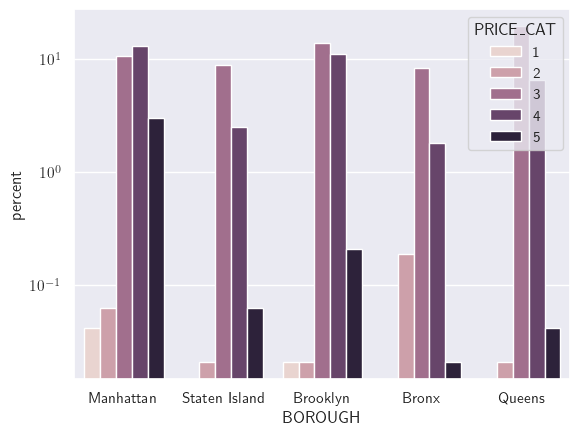

In [40]:
sns.countplot( x=df_housing.BOROUGH, hue=df_housing.PRICE_CAT, stat='percent' )
plt.yscale('log')
plt.show()

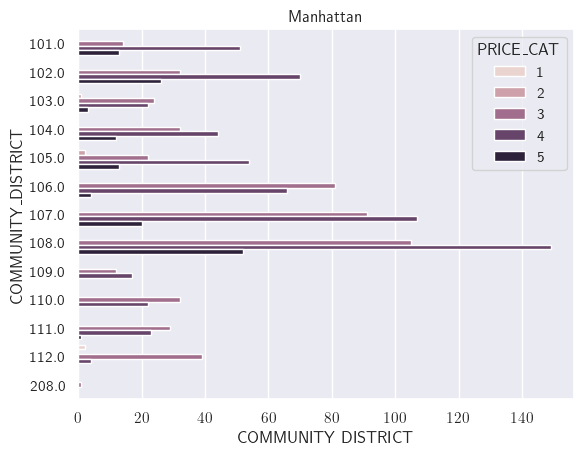

In [41]:
def boroughCD(df, borough_name):
    df_borough = df[ df['BOROUGH'] == borough_name ]
    return df_borough 

df_MHT = boroughCD(df_housing, 'Manhattan')

sns.countplot(y=df_MHT.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
plt.xlabel(r'COMMUNITY DISTRICT')
plt.title('Manhattan')
plt.show()

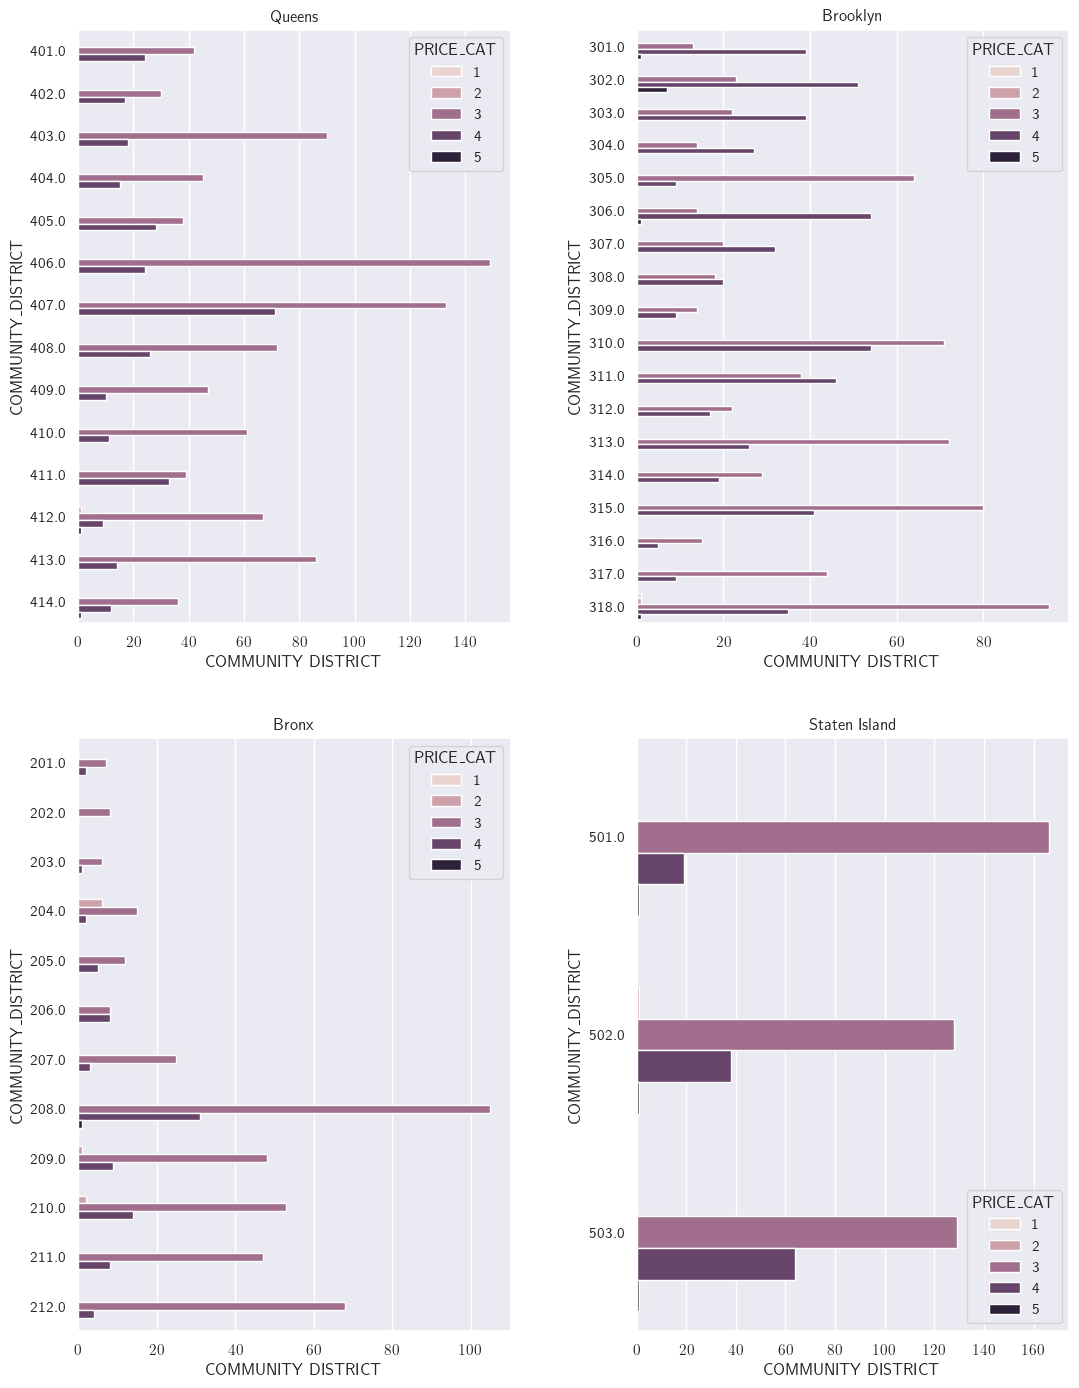

In [42]:
df_QUEENS = boroughCD(df_housing, 'Queens')
df_BKLN = boroughCD(df_housing, 'Brooklyn')
df_BRNX = boroughCD(df_housing, 'Bronx')
df_STAT = boroughCD(df_housing, 'Staten Island')

fig, ax = plt.subplots(2,2, figsize=(12,15))
fig.tight_layout(pad=5)

sns.countplot(ax=ax[0,0], y=df_QUEENS.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
ax[0,0].set_xlabel(r'COMMUNITY DISTRICT')
ax[0,0].set_title(r'Queens')

sns.countplot(ax=ax[0,1], y=df_BKLN.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
ax[0,1].set_xlabel(r'COMMUNITY DISTRICT')
ax[0,1].set_title(r'Brooklyn')

sns.countplot(ax=ax[1,0], y=df_BRNX.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
ax[1,0].set_xlabel(r'COMMUNITY DISTRICT')
ax[1,0].set_title(r'Bronx')

sns.countplot(ax=ax[1,1], y=df_STAT.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
ax[1,1].set_xlabel(r'COMMUNITY DISTRICT')
ax[1,1].set_title(r'Staten Island')

plt.show()

In [43]:
df_housing.groupby('BOROUGH').describe()['PRICE']

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
Bronx,499.0,7.583150e+05,1.008273e+06,49500.0,282500.0,590000.0,894500.0,1.400000e+07
Brooklyn,1212.0,1.431187e+06,1.904929e+06,5800.0,567250.0,949000.0,1650000.0,3.150000e+07
Manhattan,1292.0,4.277375e+06,8.805249e+06,2494.0,699000.0,1495000.0,4146250.0,1.950000e+08
Queens,1250.0,8.228747e+05,8.032906e+05,75000.0,349000.0,668000.0,1044250.0,1.500000e+07
Staten Island,548.0,4.831589e+06,9.170286e+07,90000.0,549000.0,734900.0,989000.0,2.147484e+09


In [44]:
def price_histplot_borough(df, borough_name, ax):
    df_borough = df[ df.BOROUGH == borough_name ]
    lq, uq = df_borough.PRICE.quantile([0.25, 0.75])
    iqr = uq - lq

    sns.histplot( x=df_borough.PRICE, ax=ax, bins='auto' )
    ax.axvspan(lq, uq, 0, 500, color='red', alpha=0.1)
    ax.axvspan(uq, uq + 1.5*iqr, 0, 500, color='black', alpha=0.1)

    ax.set_xscale('log')
    ax.set_title(borough_name)
    
    return(ax)

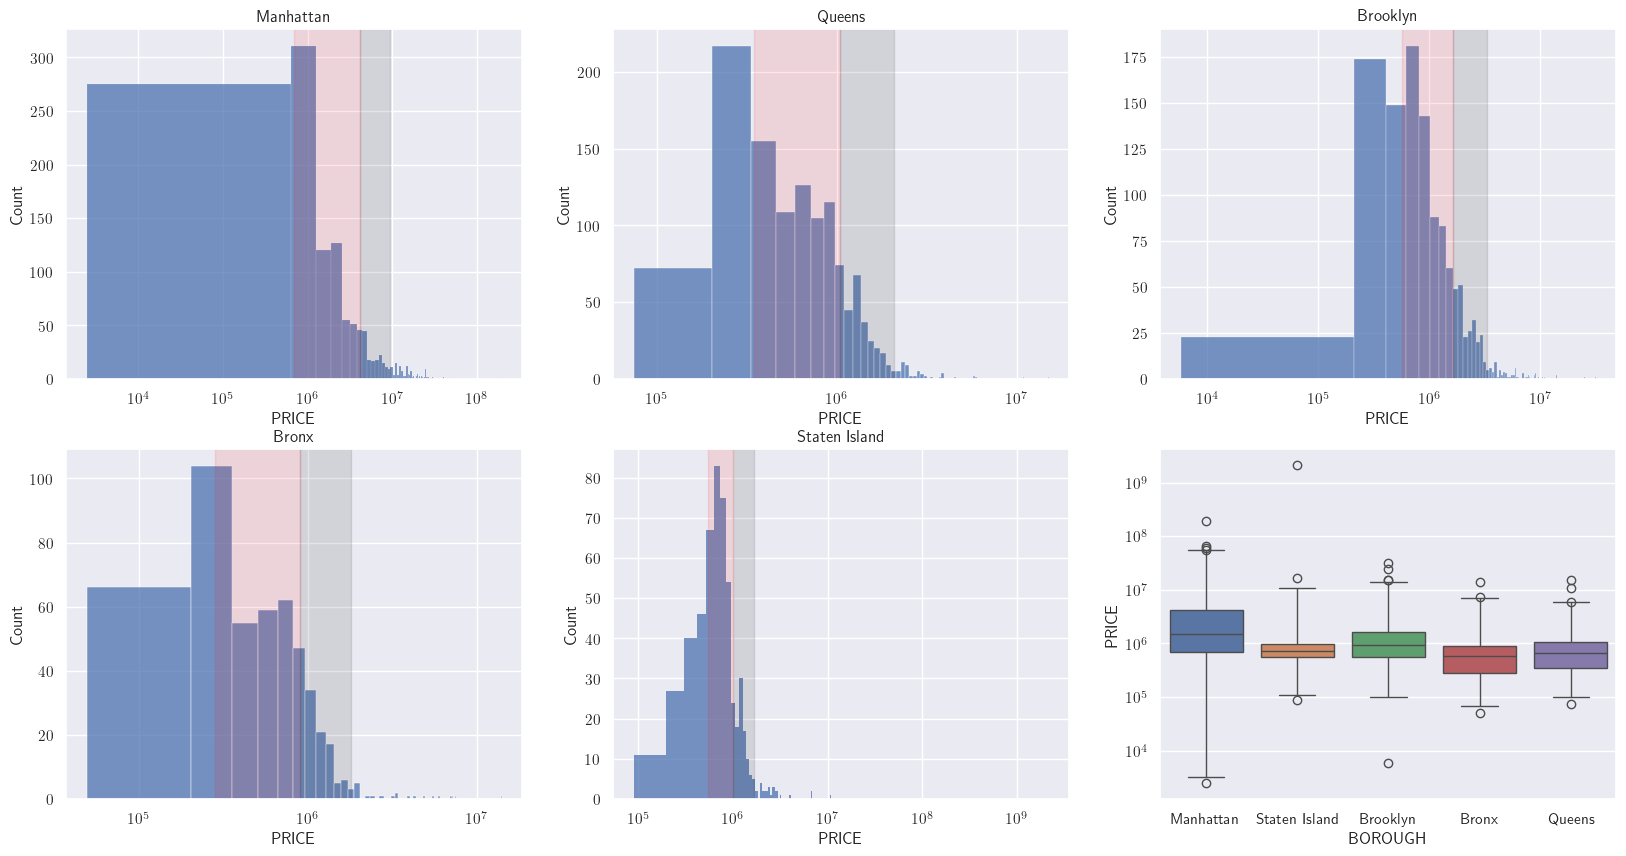

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))

price_histplot_borough(df_housing, 'Manhattan', ax=ax[0,0])
price_histplot_borough(df_housing, 'Queens', ax=ax[0,1])
price_histplot_borough(df_housing, 'Brooklyn', ax=ax[0,2])
price_histplot_borough(df_housing, 'Bronx', ax=ax[1,0])
price_histplot_borough(df_housing, 'Staten Island', ax=ax[1,1])

sns.boxplot( x=df_housing.BOROUGH, y=df_housing.PRICE, hue=df_housing.BOROUGH, whis=[0.03, 99.7], ax=ax[1,2] )
ax[1,2].set_yscale('log')

plt.show()

One further feature should be included. Community Distric and ZIP code information are fine, but prospective buyers are mostly likely to search for listings by borough and neighborhoods therein. Hence, it would be ideal to incorporate neighborhood information by using the ZIP code associated with each listing.

In [46]:
ny_nbhd = pd.read_csv('nyc-zip-codes.csv')

ny_nbhd.head()

,Borough,Neighborhood,ZipCode
0,Bronx,Central Bronx,10453
1,Bronx,Central Bronx,10457
2,Bronx,Central Bronx,10460
3,Bronx,Bronx Park and Fordham,10458
4,Bronx,Bronx Park and Fordham,10467


In [54]:
ny_nbhd.ZipCode = ny_nbhd.ZipCode.astype(str)

print('Number of different neighborhoods included: ' + str(len(ny_nbhd.Neighborhood.unique())))

ny_nbhd.Neighborhood.unique()

Number of different neighborhoods included: 42


array(['Central Bronx', 'Bronx Park and Fordham',
       'High Bridge and Morrisania', 'Hunts Point and Mott Haven',
       'Kingsbridge and Riverdale', 'Northeast Bronx', 'Southeast Bronx',
       'Central Brooklyn', 'Southwest Brooklyn', 'Borough Park',
       'Canarsie and Flatlands', 'Southern Brooklyn',
       'Northwest Brooklyn', 'Flatbush', 'East New York and New Lots',
       'Greenpoint', 'Sunset Park', 'Bushwick and Williamsburg',
       'Central Harlem', 'Chelsea and Clinton', 'East Harlem',
       'Gramercy Park and Murray Hill', 'Greenwich Village and Soho',
       'Lower Manhattan', 'Lower East Side', 'Upper East Side',
       'Upper West Side', 'Inwood and Washington Heights',
       'Northeast Queens', 'North Queens', 'Central Queens', 'Jamaica',
       'Northwest Queens', 'West Central Queens', 'Rockaways',
       'Southeast Queens', 'Southwest Queens', 'West Queens',
       'Port Richmond', 'South Shore', 'Stapleton and St. George',
       'Mid-Island'], dtype=object

In [151]:
def ZIP_to_neighborhood(df1, df2):

    ''' 
    Pass two dataframes - df1: housing dataframe, df2: zip to neighborhood dataframe

    Iterate through the rows of df1, match the zip to df2 and extract neighborhood information and store it
    in a new attributes column
    '''
    df_dummy = df1.copy()
    df_dummy['NEIGHBORHOOD'] = ''

    for index, row in df_dummy.iterrows():
        zipcode = row['ZIP_CODES']
        idx = df2.index[ df2['ZipCode'] == zipcode ].to_list()

        if len(idx) == 1:
            idx = idx[0]
            df_dummy.loc[index, 'NEIGHBORHOOD'] =  df2.loc[idx, 'Neighborhood']
        else:
            df_dummy.loc[index, 'NEIGHBORHOOD'] = np.nan

    return df_dummy 

df_housing = ZIP_to_neighborhood(df_housing, ny_nbhd)
df_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,LOG_SQFT,PRICE_CAT,GEO_POINTS,BOROUGH,COMMUNITY_DISTRICT,NEIGHBORHOOD
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,...,40.761255,-73.974483,10022,5.498311,3.146128,3,POINT (-73.9744834 40.761255),Manhattan,105,Gramercy Park and Murray Hill
1,Brokered by Serhant,Condo,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,...,40.766393,-73.980991,10019,8.290035,4.244153,5,POINT (-73.98099089999999 40.7663935),Manhattan,105,Chelsea and Clinton
2,Brokered by Sowae Corp,House,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,...,40.541805,-74.196109,10312,5.414973,3.304275,3,POINT (-74.1961086 40.5418051),Staten Island,503,South Shore
3,Brokered by COMPASS,Condo,69000,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,...,40.761398,-73.974613,10022,4.838849,2.648360,2,POINT (-73.9746128 40.7613979),Manhattan,105,Gramercy Park and Murray Hill
4,Brokered by Sotheby's International Realty - E...,Townhouse,55000000,7,2.0,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,...,40.767224,-73.969856,10065,7.740363,4.151523,5,POINT (-73.9698561 40.7672235),Manhattan,108,Upper East Side


The housing dataframe has been filled in with the neighborhood information according to ZIP_CODE. However, not all of the zip codes in the df_housing dataframe were contained in the neighborhood dataframe used. We find that there are 27 missing entries, which we drop.

In [154]:
print('Number of zip codes that did not match: ' + str(df_housing.NEIGHBORHOOD.isnull().sum()))

df_housing.dropna(inplace=True)

Number of zip codes that did not match: 27


## Fixing outliers and other possibly misrepresented data

One way we can check the high price outlier listings is to use the stated addresses and cross-check with a real estate website like Zillow. We take a look at the ten most expensive listings in the dataframe. Now, a multi-billion dollar home should sound alarm bells from the start. Checking with Zillow, the 2.147 billion USD property in Staten Island is actually listed at 2.495 million USD with total square footage of 4,950.

In [156]:
df_housing.sort_values(by=['PRICE'], ascending=False).head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,LOG_SQFT,PRICE_CAT,GEO_POINTS,BOROUGH,COMMUNITY_DISTRICT,NEIGHBORHOOD
304,Brokered by ANNE LOPA REAL ESTATE,House,2147483647,7,6.0,10000.000000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,...,40.518484,-74.224418,10309,9.331930,4.000000,5,POINT (-74.2244185 40.5184841),Staten Island,503,South Shore
1,Brokered by Serhant,Condo,195000000,7,10.0,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,...,40.766393,-73.980991,10019,8.290035,4.244153,5,POINT (-73.98099089999999 40.7663935),Manhattan,105,Chelsea and Clinton
69,Brokered by Sotheby's International Realty - E...,Townhouse,65000000,3,2.0,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,...,40.776561,-73.963317,10075,7.812913,4.181844,5,POINT (-73.96331669999999 40.7765613),Manhattan,108,Upper East Side
1075,Brokered by COMPASS,Co-op,60000000,8,8.0,2184.207862,960 5th Ave Unit 12,"Manhattan, NY 10075","960 5th Ave Unit 12Manhattan, NY 10075",New York,...,40.775642,-73.964247,10075,7.778151,3.339294,5,POINT (-73.9642465 40.7756423),Manhattan,108,Upper East Side
141,Brokered by Douglas Elliman - 575 Madison Ave,House,56000000,11,10.0,24000.000000,9 W 54th St,"New York, NY 10019","9 W 54th StNew York, NY 10019",United States,...,40.761600,-73.976191,10019,7.748188,4.380211,5,POINT (-73.9761913 40.7616),Manhattan,105,Chelsea and Clinton
4,Brokered by Sotheby's International Realty - E...,Townhouse,55000000,7,2.0,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,...,40.767224,-73.969856,10065,7.740363,4.151523,5,POINT (-73.9698561 40.7672235),Manhattan,108,Upper East Side
99,Brokered by Douglas Elliman - 575 Madison Ave,House,55000000,8,8.0,12000.000000,25 Riverside Dr,"New York, NY 10023","25 Riverside DrNew York, NY 10023",United States,...,40.782238,-73.984632,10023,7.740363,4.079181,5,POINT (-73.98463219999999 40.782238),Manhattan,107,Upper West Side
626,"Brokered by Nest Seekers International, Midtown",Condo,50000000,6,6.0,6569.000000,100 Vandam St Apt 20A,"New York, NY 10013","100 Vandam St Apt 20ANew York, NY 10013",New York,...,40.726633,-74.008832,10013,7.698970,3.817499,5,POINT (-74.00883210000001 40.7266327),Manhattan,102,Greenwich Village and Soho
1453,Brokered by Corcoran East Side,Co-op,48000000,5,2.0,2184.207862,740 Park Ave # 4 & 5B,"New York, NY 10021","740 Park Ave # 4 & 5BNew York, NY 10021",New York,...,40.770752,-73.964528,10021,7.681241,3.339294,5,POINT (-73.9645283 40.7707516),Manhattan,108,Upper East Side
3388,Brokered by Sotheby's International Realty - E...,Co-op,45000000,5,2.0,2184.207862,4 E 66th St Fl 7,"New York, NY 10065","4 E 66th St Fl 7New York, NY 10065",New York,...,40.768301,-73.969734,10065,7.653213,3.339294,5,POINT (-73.9697336 40.768301),Manhattan,108,Upper East Side


In [157]:
# Correcting this entry

df_housing.loc[304, 'PRICE'] = 2495000
df_housing.loc[304, 'PROPERTYSQFT'] = 4950.000
df_housing.loc[304, 'LOG_PRICE'] = np.log10(2495000) 
df_housing.loc[304, 'LOG_SQFT'] = np.log10(4950.000)

df_housing.loc[304, :]

BROKERTITLE                              Brokered by ANNE LOPA REAL ESTATE
TYPE                                                                 House
PRICE                                                              2495000
BEDS                                                                     7
BATH                                                                   6.0
PROPERTYSQFT                                                        4950.0
ADDRESS                                                 6659-6675 Amboy Rd
STATE                                                   New York, NY 10309
MAIN_ADDRESS                          6659-6675 Amboy RdNew York, NY 10309
ADMINISTRATIVE_AREA_LEVEL_2                                  United States
LOCALITY                                                          New York
SUBLOCALITY                                                Richmond County
STREET_NAME                                                  Staten Island
LONG_NAME                

Moreover, we should also check the three least expensive listings. The first two turns out to be apartments with monthly rent information that are similar to the price listings. However, no overall property price can be found. For the the third entry, we find that its 2023 assessed price is 179,000 USD with square footage of 4,000. With these information, the lowest two price listings will be dropped from the dataframe and the the third entry below modified.

In [158]:
df_housing.sort_values(by=['PRICE']).head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,LOG_SQFT,PRICE_CAT,GEO_POINTS,BOROUGH,COMMUNITY_DISTRICT,NEIGHBORHOOD
317,Brokered by Living NY - Main Office,Others,2494,2,1.0,2184.207862,635 W 170th St Apt 4F,"New York, NY 10032","635 W 170th St Apt 4FNew York, NY 10032",New York,...,40.843406,-73.940795,10032,3.396896,3.339294,1,POINT (-73.9407947 40.8434062),Manhattan,112,Inwood and Washington Heights
310,Brokered by Living NY - Main Office,Others,3225,3,1.0,2184.207862,635 W 170th St Apt 2C,"New York, NY 10032","635 W 170th St Apt 2CNew York, NY 10032",New York,...,40.843406,-73.940795,10032,3.508530,3.339294,1,POINT (-73.9407947 40.8434062),Manhattan,112,Inwood and Washington Heights
360,Brokered by Century 21 Realty First,Land,5800,3,2.0,2184.207862,4515 Avenue N Lot 5,"Brooklyn, NY 11234","4515 Avenue N Lot 5Brooklyn, NY 11234",New York,...,40.618915,-73.931211,11234,3.763428,3.339294,1,POINT (-73.931211 40.618915),Brooklyn,318,Canarsie and Flatlands


In [159]:
df_housing.drop( index=[310, 317, 360], inplace=True )

df_housing.sort_values(by=['PRICE']).head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,LOG_SQFT,PRICE_CAT,GEO_POINTS,BOROUGH,COMMUNITY_DISTRICT,NEIGHBORHOOD
463,Brokered by Morris Park Realty Group,Co-op,49500,3,2.0,800.0,150 City Island Ave Unit E3,"Bronx, NY 10464","150 City Island Ave Unit E3Bronx, NY 10464",New York,...,40.843284,-73.784603,10464,4.694605,2.903090,2,POINT (-73.7846028 40.8432844),Bronx,210,Southeast Bronx
979,Brokered by COMPASS,Condo,60000,3,1.0,445.0,2 E 55th St Unit 809W35,"Manhattan, NY 10022","2 E 55th St Unit 809W35Manhattan, NY 10022",New York,...,40.761398,-73.974613,10022,4.778151,2.648360,2,POINT (-73.9746128 40.7613979),Manhattan,105,Gramercy Park and Murray Hill
188,Brokered by All American Realty Management,Others,65000,3,1.0,230.0,1287266 45 Madison St Unit 1,"Manhattan, NY 10038","1287266 45 Madison St Unit 1Manhattan, NY 10038",New York,...,40.712070,-73.998326,10038,4.812913,2.361728,2,POINT (-73.9983258 40.7120703),Manhattan,103,Lower Manhattan


Now, we handle those listings that have the same 2184 sqft area. Since they represent a statistically significant proportion of the data, they cannot simply be dropped. This was also the reasoning when this dataset was created in the first place. Here, we replace the sqft value of each of these by looking at properties in the same ZIP code and taking a mean. But before, let us see how these data points are representative of each borough.

In [160]:
df_same_sqft = df_housing[ df_housing.PROPERTYSQFT == area ]

df1 = df_same_sqft.groupby('BOROUGH')[['TYPE']].agg('count')
df2 = df_housing.groupby('BOROUGH')[['TYPE']].agg('count')

df_merged = df1.merge( df2, on='BOROUGH' )
df_merged.rename( columns={'TYPE_x': 'mislabeled', 'TYPE_y': 'total'}, inplace=True )

df_merged

,mislabeled,total
BOROUGH,,
Bronx,95,499
Brooklyn,295,1200
Manhattan,520,1283
Queens,674,1241
Staten Island,27,548


In [161]:
'''
Create a function that fixes the sqft values
'''
def fix_sqft(df, area):
    df1 = df[ df['PROPERTYSQFT'] != area ]
    df_sub = df[ df['PROPERTYSQFT'] == area ] # part of dataset that has the mislabeled area

    df_grouped = df.groupby(['TYPE', 'ZIP_CODES'])[['PROPERTYSQFT']].agg('mean') 

    for index, row in df_sub.iterrows():
        cd = row['ZIP_CODES']
        type = row['TYPE']

        mean_sqft = df_grouped.loc[type, cd][-1]
        df_sub.loc[index, 'PROPERTYSQFT'] = mean_sqft

    return pd.concat([df1, df_sub])

df_fixed = fix_sqft(df_housing, area)    

The function somewhat fixes the issue. Maybe there is a much better way to do this.

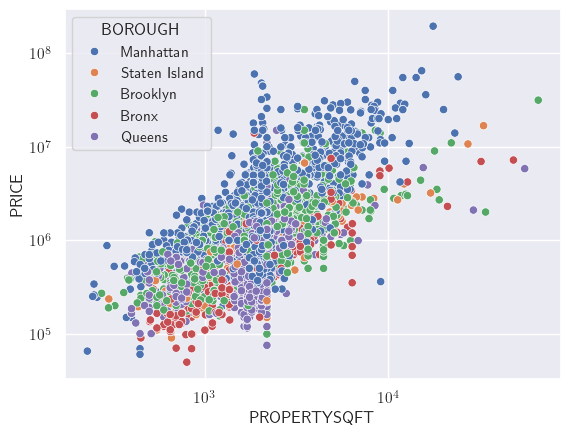

In [162]:
sns.scatterplot( x=df_fixed.PROPERTYSQFT, y=df_fixed.PRICE, hue=df_fixed.BOROUGH )
plt.xscale('log')
plt.yscale('log')
plt.show()

## Regression analysis

Here we perform a regression analysis on the cleaned dataframe. We note that the did not remove the outliers which were above the 99-th quantile purely because such expensive listings were not erroneous and removing them would be unwarranted. As a result, we will use tree-based regressors - (i) Random Forest and (ii) Extreme Gradient Boosted trees to regression since these generalize well in the presence of outliers. We consider the following attributes for training the ML model
1. TYPE
2. BEDS
3. BATH,
4. LOG_SQFT
5. BOROUGH
6. NEIGHBORHOOD

with LOG_PRICE being a target variable. The reason for using LOG_PRICE is that the range of values gets significant squeezed and is, therefore, much easier for a learning algorithm to be trained with. The conversion between the two prices is very straighforward
$$ \rm{PRICE} = 10^{ \rm{LOGPRICE} } $$
Furthermore, the reason for removing latitude and longitude in favor of neighborhood is very simple, in that it is easier for people to search based on their preferred neighborhoods.

In [203]:
cols = ['TYPE', 'LOG_PRICE', 'BEDS', 'BATH', 'LOG_SQFT', 'BOROUGH', 'NEIGHBORHOOD']

df_housing_new = df_fixed[cols]
df_housing_new.head()


,TYPE,LOG_PRICE,BEDS,BATH,LOG_SQFT,BOROUGH,NEIGHBORHOOD
0,Condo,5.498311,2,2.0,3.146128,Manhattan,Gramercy Park and Murray Hill
1,Condo,8.290035,7,10.0,4.244153,Manhattan,Chelsea and Clinton
2,House,5.414973,4,2.0,3.304275,Staten Island,South Shore
3,Condo,4.838849,3,1.0,2.648360,Manhattan,Gramercy Park and Murray Hill
4,Townhouse,7.740363,7,2.0,4.151523,Manhattan,Upper East Side


We are foregoing scaling of the variables for three reasons -
1. Since the logarithm of PROPERTYSQFT has been chosen, the range of all values are, at best, upto the tens, which is small.
2. Tree-based regressors are quite insensitive to scaling, hence it should not be a problem.
3. Predicting values will be easy since input variables do not need to be transformed by the scaler used.

In [204]:
X = df_housing_new.drop('LOG_PRICE', axis=1)
y = df_housing_new.LOG_PRICE

X = pd.get_dummies(X, columns=['TYPE', 'BOROUGH', 'NEIGHBORHOOD'], dtype='float', prefix='', prefix_sep='')
X.head()

,BEDS,BATH,LOG_SQFT,Co-op,Condo,Condop,House,Land,Multi-family home,Others,...,Southeast Queens,Southern Brooklyn,Southwest Brooklyn,Southwest Queens,Stapleton and St. George,Sunset Park,Upper East Side,Upper West Side,West Central Queens,West Queens
0,2,2.0,3.146128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,10.0,4.244153,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2.0,3.304275,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,2.648360,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,2.0,4.151523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [205]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

RF_reg = RandomForestRegressor()
RF_reg.fit(X_train, y_train)
y_pred_RF = RF_reg.predict(X_test)
rmse_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print( 'The R-squared score for Random Forest Regressor is ' + str(RF_reg.score(X_test, y_test)) )
print( 'The R-squared score for XGBoosted Regressor is ' + str(xgb_reg.score(X_test, y_test)) )
print( 'The RMSE for Random Forest Regressor is ' + str(rmse_RF) )
print( 'The RMSE for XGBoosted Regressor is ' + str(rmse_xgb) )

The R-squared score for Random Forest Regressor is 0.8287189847323247
The R-squared score for XGBoosted Regressor is 0.8248904266830905
The RMSE for Random Forest Regressor is 0.17509567219477523
The RMSE for XGBoosted Regressor is 0.17704176983617492


Even with the default hyperparameters, the use of LOG_PRICE gives us very good $R^2$ scores for both Random Forest and XGB. The RMSE values are also smaller than $\sigma_{\rm{LOGPRICE}}$, which is indicative of good predictive power of the model. We now perform cross-validation on these two Regressors with cv=5 before performing hyperparameter fine-tuning.

The mean RMSE for Random Forest Regression over 10-folds is 0.18459054042143866
The mean RMSE for XGBoosted Regression over 10-folds is 0.1862784209058214


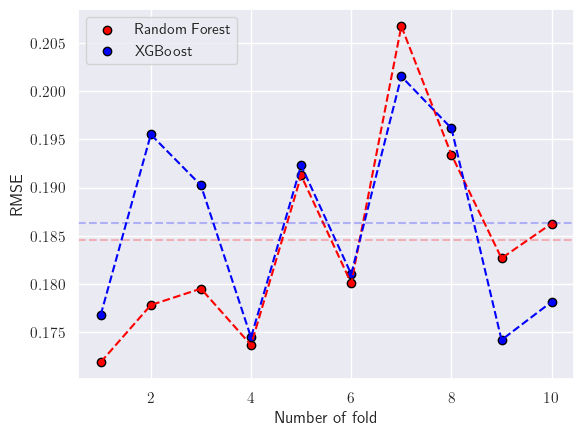

In [206]:
from sklearn.model_selection import cross_val_score

cv_scores_RF = cross_val_score(RF_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
avg_cv_score_RF = np.sqrt(-cv_scores_RF.mean())

cv_scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
avg_cv_score_xgb = np.sqrt(-cv_scores_xgb.mean())

fig, ax = plt.subplots()

ax.scatter(np.arange(1,11), np.sqrt(-cv_scores_RF), color='red', edgecolor='black', label=r'Random Forest')
ax.plot(np.arange(1,11), np.sqrt(-cv_scores_RF), color='red', linestyle='dashed')
ax.axhline(avg_cv_score_RF, color='red', linestyle='dashed', alpha=0.25)

ax.scatter(np.arange(1,11), np.sqrt(-cv_scores_xgb), color='blue', edgecolor='black', label=r'XGBoost')
ax.plot(np.arange(1,11), np.sqrt(-cv_scores_xgb), color='blue', linestyle='dashed')
ax.axhline(avg_cv_score_xgb, color='blue', linestyle='dashed', alpha=0.25)

ax.set_xlabel(r'Number of fold')
ax.set_ylabel(r'RMSE')

plt.legend()
plt.show

print( 'The mean RMSE for Random Forest Regression over 10-folds is ' + str( np.sqrt(-cv_scores_RF.mean()) ) )
print( 'The mean RMSE for XGBoosted Regression over 10-folds is ' + str( np.sqrt(-cv_scores_xgb.mean()) ) )

### Grid search and Learning Curves

Now, we perform GridSearchCV on the two regressors to obtain the optimal parameter set that will be used in making the final predictions.

In [207]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV

# Defining a function that containts the two regressors and associated parameter grid
def ParamSearchModels(X, y):

    algorithms = {
        'Random_Forest': {
            'model'    : RandomForestRegressor(),
            'params'   : {
                'n_estimators' : [50, 100, 150, 200],
                'max_depth'    : [5, 10, 15],
                'criterion'    : ['squared_error', 'friedman_mse']
            }
        },
        'XG_Boost'     : {
            'model'    : XGBRegressor(),
            'params'   : {
                'n_estimators' : [50, 100, 150, 200],
                'max_depth'    : [5, 10, 15],
                'gamma'        : [0.01, 0.05, 0.1],
                'learning_rate': [0.01, 0.1, 1]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=10)
    
    for algorithm, config in algorithms.items():
        GS = GridSearchCV( 
            config['model'], 
            config['params'], 
            cv=cv, 
            return_train_score=False,
            scoring = ['r2', 'neg_root_mean_squared_error'], 
            refit = 'r2',
            n_jobs = -1
        )
        GS.fit(X, y)
        scores.append(
            {
                'model'       : algorithm,
                'best_score'  : GS.best_score_,
                'best_params' : GS.best_params_ 
            }
        )

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [208]:
GS_params_data = ParamSearchModels(X, y)

GS_params_data

,model,best_score,best_params
0,Random_Forest,0.836159,"{'criterion': 'friedman_mse', 'max_depth': 15,..."
1,XG_Boost,0.837310,"{'gamma': 0.01, 'learning_rate': 0.1, 'max_dep..."


After performing hyperparameter fine-tuning, we see that both regressors perform similarly, yielding $R^2 \approx 0.83$. We find that, on average, the XGBoosted Regressor performs slightly better than the XGBoosted Regressor. Through grid search, the optimal hyperparameters that reduce the MSE are provided below.

In [209]:
print(GS_params_data.loc[0, 'best_params'])
print(GS_params_data.loc[1, 'best_params'])

{'criterion': 'friedman_mse', 'max_depth': 15, 'n_estimators': 150}
{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


We finally check the learning curve for the XGB Regressor for varying numbers of samples used during training. The trends observed are quite encouraging. As we expect, the error during training for small training sizes should be small, as we see here too. With increase in training size, we observe a steady increase in the error. Now, for the test set, we expect it to start with a larger error for small training sets. Even though the curve reaches soomewhat of a plateau, there is a dip after training size of 3000 and a slow decrease. We can expect that, with more data, these two curves will converge to an optimal RMSE.

In [210]:
from sklearn.model_selection import learning_curve, LearningCurveDisplay

train_sizes, train_scores, valid_scores = learning_curve(
    XGBRegressor(gamma = 0.01, learning_rate = 0.1, max_depth = 5, n_estimators = 200),
    X, y,
    scoring = 'neg_mean_squared_error',
    train_sizes = np.linspace(0.01, 1.0, 50),
    cv=5,
    n_jobs=-1
)

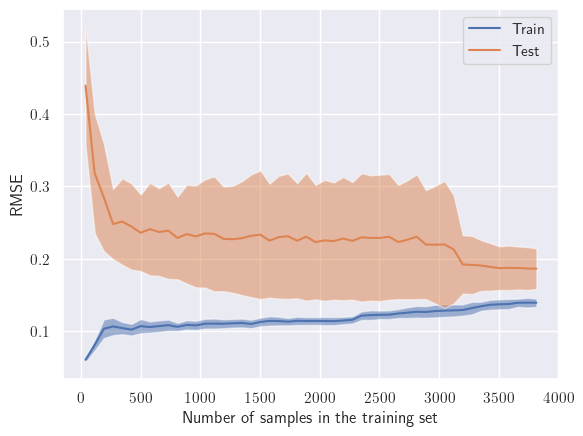

In [211]:
disp = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=np.sqrt(-train_scores),
    test_scores=np.sqrt(-valid_scores),
    score_name = 'RMSE'
)


disp.plot()
plt.show()

In [215]:
# Instantiate a XGB Regressor with the grid search parameters

xgb_best = XGBRegressor(gamma = 0.01, learning_rate = 0.1, max_depth = 5, n_estimators = 200)
xgb_best.fit(X_train, y_train)

def predict_price(type, beds, baths, size, borough, neighborhood):
    ''' 
    Function for predicting the price of a property with the following arguments
    (1) type : Condo, House, Townhouse, Co-op, Multi-family home, Land, Condop, Others
    (2) beds : no. of bedrooms
    (3) baths : no. of bathrooms
    (4) size : area in sqft; will be converted to log_sqft
    (5) borough : Manhattan, Brooklyn, Queens, Bronx, Staten Island
    (6) neighborhood : from the list of neighborhoods

    Returns 10^(LOG_PRICE)
    '''
    type_idx = np.where(X.columns == type)[0][0]
    borough_idx = np.where(X.columns == borough)[0][0]
    nbhd_idx = np.where(X.columns == neighborhood)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = beds
    x[1] = baths
    x[2] = np.log10(size) # converting the size to log_size 
    x[type_idx] = 1.0
    x[borough_idx] = 1.0
    x[nbhd_idx] = 1.0

    logprice = xgb_best.predict([x])[0]
    return 10**logprice

In [219]:
# Saving the trained model using pickle

import pickle 

with open('NYC_property_price_regression.pickle', 'wb') as f:
    pickle.dump(xgb_best, f)

# Conclusions

Here, we analyzed the NYC housing dataset that is available on Kaggle. After performing a thorough exploratory data analysis, where the different features where visually studied, we were able to determine the various trends and correlations present between them. For better interpretation of the latitude/longitude information in the dataset, we use, in addition to the already present dataset, geopandas to plot the listings on a geographical map of NYC with boundaries delineating the different boroughs and community districts. Using this, we performed further analysis on the dependence of the listing prices on borough and community districts in each borough.

Part of the data cleaning required identification of outliers. The listings with the lowest three prices were removed since it was reasonable to assume that the price listed were actually monthly rents and not the actual price of the properties. Furthermore, the most expensive listing turned out to be an incorrect entry as verified using Zillow information. The high price outliers were not removed since these were not incorrect prices and there would be no justification in removing them. Interestingly enough, the dataset did not have any missing values. However, we realized that they were filled in by the uploader, as a consequence of which there were numerous fractional numbers of bathrooms and over 1,600 listings with square footage of approximately 2,184. The former was further cleaned by rounding up all the bathrooms to integers. For the later problem, the ZIP codes of each of these listings was identified and instead of 2,184 sft, the average property size of the corresponding ZIP code was used. 

The community district information was mostly used for visualization and data cleaning purposes. For training purposes, we identified the fact that when people search for properties, they do not use latitude/longitude or community district. They may use ZIP codes, but mostly the search is carried out using Boroughs and the different neighborhoods in them. For this purpose, we used data that maps ZIP codes to neighborhoods and used it in the training data. For training, we considered the following attributes
1. TYPE
2. BEDS
3. BATH
4. LOG_SQFT
5. BOROUGH
6. NEIGHBORHOOD

which were first fitted to Random Forest and XGBoosted Regressors. After performing cross-validation and grid search, we found that both perform similary with $R^2\approx 0.83$, with the XGBoosted Regressor performing slightly better. The learning curves show that RMSE of the training and test sets potentially converge with the addition of more data.